## Servo Motor Mechanism

#### A servo motor mechanism is a system designed to precisely control the angular or linear position, velocity, and acceleration of an object. It consists of a motor coupled with a sensor for position feedback. The feedback allows the system to adjust the motor's movement to achieve the desired position or speed accurately. Servo motors are widely used in applications like robotics, CNC machinery, and automated manufacturing due to their high precision and reliability.

### Objective

#### The objective of this code is to build and evaluate a linear regression model to predict a target variable (`Class`) based on features from a dataset. It involves importing and preprocessing data, splitting it into training and testing sets, and training the model. The model's performance is then evaluated using metrics like mean squared error, mean absolute error, and R² score. Finally, the model is used to make predictions on new data.

### Data Source

#### A data source is the origin from which data is obtained for analysis, processing, or storage. It can be a database, a file (like CSV, Excel, or JSON), an API, a web service, or any other repository where data is stored. Data sources provide the necessary raw information for generating insights, making decisions, and supporting various applications. They are fundamental in data-driven tasks across different domains and industries.

### Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

### Import Data

In [2]:
df = pd.read_csv(r'C:\Users\gdeep\OneDrive\Downloads\Servo Mechanism.csv')

### Describe Data

In [3]:
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)
print(df.shape)
print(df[['Motor']].value_counts())
print(df[['Screw']].value_counts())

  Motor Screw  Pgain  Vgain  Class
0     E     E      5      4      4
1     B     D      6      5     11
2     D     D      4      3      6
3     B     A      3      2     48
4     D     B      6      5      6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB
None
            Pgain       Vgain       Class
count  167.000000  167.000000  167.000000
mean     4.155689    2.538922   21.173653
std      1.017770    1.369850   13.908038
min      3.000000    1.000000    1.000000
25%      3.000000    1.000000   10.500000
50%      4.000000    2.000000   18.000000
75%      5.000000    4.000000   33.500000
max      6.000000    5.000000   51.000000
I

### Data Preprocessing

In [4]:
df.replace({'Motor': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}}, inplace=True)
df.replace({'Screw': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}}, inplace=True)

### Define Target Variable (y) and Feature Variables (X)

In [5]:
y = df['Class']
x = df.drop('Class', axis=1)

### Train Test Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2529)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(116, 4) (51, 4) (116,) (51,)


### Modeling

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [8]:
y_pred = lr.predict(x_test)
print(y_pred.shape)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

(51,)
66.03589175595566
7.1905396772512375
0.6807245170563926


### Data Visualization

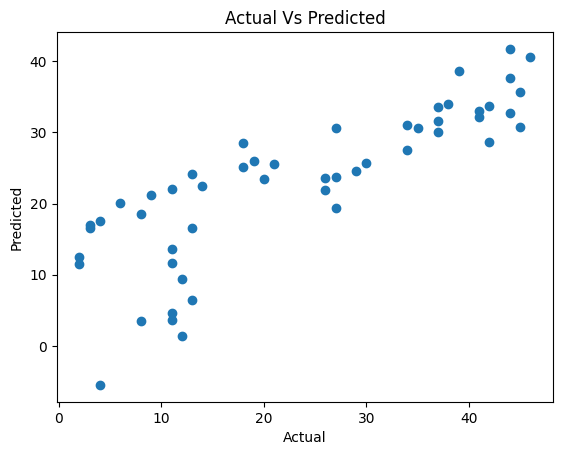

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")
plt.show()

### Prediction

In [10]:
x_new = df.sample(1)
x_new = x_new.drop('Class', axis=1)
y_pred_new = lr.predict(x_new)
print(y_pred_new)

[25.00857912]


### Explanation

#### Import Library: This section imports the necessary libraries for data manipulation, model building, and evaluation.
Import Data: Reads the CSV file into a pandas DataFrame.

Describe Data: Displays the first few rows, information about the DataFrame, descriptive statistics, column names, shape, and value counts of specific columns.

Data Preprocessing: Replaces categorical values with numerical values for modeling.

Define Target Variable (y) and Feature Variables (X): Separates the target variable (Class) and features.

Train Test Split: Splits the data into training and testing sets.

Modeling: Creates and trains a linear regression model.

Model Evaluation: Predicts the test set results and evaluates the model's performance using MSE, MAE, and R² score.

Data Visualization: Plots actual vs. predicted values to visualize the model's performance.

Prediction: Makes a prediction for a new sample from the DataFrame.